Topics covered:
*   OOP - Object oriented programming (continued)

### Class Relationships

- Aggregation
- Inheritance

### Aggregation(Has-A relationship)

One class owns the other class.

Eg: Customer -> owns(has a) -> Address
<br>Restraunt -> has a -> Menu

In [3]:
# example
class Customer:

  def __init__(self,name,gender,address):
    self.name = name
    self.gender = gender
    self.address = address

  def print_address(self):
    print(self.address.city,self.address.pin,self.address.state)

class Address:

  def __init__(self,city,pin,state):
    self.city = city
    self.pin = pin
    self.state = state

add1 = Address('gurgaon',122011,'haryana')
cust1 = Customer('nitish','male',add1)
cust1.print_address()

gurgaon 122011 haryana


In [1]:
# what about private attribute of owned class - can't access from owner class (outside of its class) -> use getter method to access private attributes

class Customer:

  def __init__(self,name,gender,address):
    self.name = name
    self.gender = gender
    self.address = address

  def print_address(self):
    print(self.address.__city,self.address.pin,self.address.state)

class Address:

  def __init__(self,city,pin,state):
    self.__city = city
    self.pin = pin
    self.state = state

add1 = Address('gurgaon',122011,'haryana')
cust = Customer('nitish','male',add1)

cust.print_address()

AttributeError: 'Address' object has no attribute '_Customer__city'

In aggregation, owner class are unable to access private attributes of owned class. -> Use getter method.

In [2]:
class Customer:

  def __init__(self,name,gender,address):
    self.name = name
    self.gender = gender
    self.address = address

  def print_address(self):
    print(self.address.get_city(),self.address.pin,self.address.state)   # for city calling its getter method

class Address:

  def __init__(self,city,pin,state):
    self.__city = city
    self.pin = pin
    self.state = state

  def get_city(self):    # city getter method
    return self.__city

add1 = Address('gurgaon',122011,'haryana')
cust = Customer('nitish','male',add1)

cust.print_address()

gurgaon 122011 haryana


In [4]:
class Customer:

  def __init__(self,name,gender,address):
    self.name = name
    self.gender = gender
    self.address = address

  def print_address(self):
    print(self.address.get_city(),self.address.pin,self.address.state)

  def edit_profile(self,new_name,new_city,new_pin,new_state):   # edit profile -> here updating name and address will update in Address class
    self.name = new_name
    self.address.edit_address(new_city,new_pin,new_state)

class Address:

  def __init__(self,city,pin,state):
    self.__city = city
    self.pin = pin
    self.state = state

  def get_city(self):
    return self.__city

  def edit_address(self,new_city,new_pin,new_state):   # edit address -> updating address here
    self.__city = new_city
    self.pin = new_pin
    self.state = new_state

add1 = Address('gurgaon',122011,'haryana')
cust = Customer('nitish','male',add1)

cust.print_address()

cust.edit_profile('ankit','pune',123432,'maharashtra')
cust.print_address()

gurgaon 122011 haryana
pune 123432 maharashtra


##### Aggregation class diagram

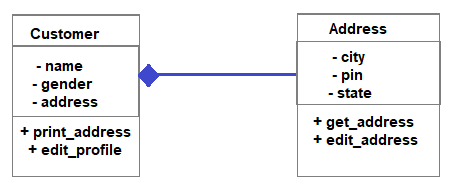

### Inheritance

- What is inheritance
- Benefit of Inheritance - Code Reusability

In [ ]:
# Inheritance and it's benefits - code reusability, helps to follow DRY method (DRY -> don't repeat yourself)

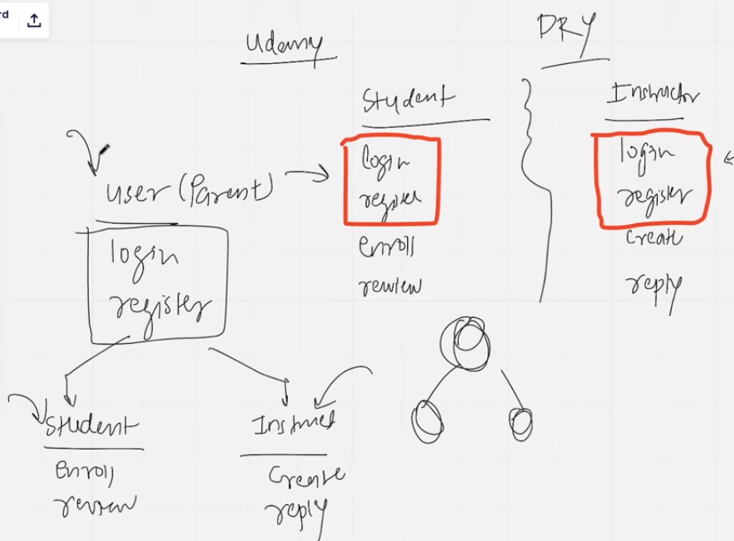

In [1]:
# Example

# parent class
class User:

  def __init__(self):
    self.name = 'nitish'

  def login(self):
    print('login')

# child class
class Student(User):    # creating relationship

  def enroll(self):
    print('enroll into the course')

u = User()
s = Student()

print(s.name)
s.login()
s.enroll()

nitish
login
enroll into the course


##### Inheritance Class diagram

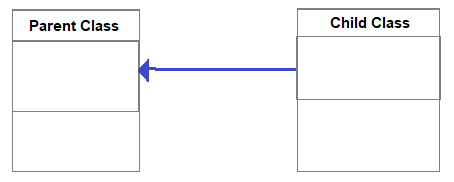

##### What gets inherited?

- Constructor
- Non Private Attributes
- Non Private Methods


*   If child class don't have its constructor, then it will call parent class constructor automatically.
*   If child class have its constructor, then parent class constructor will not execute.
*   Child can't access private members of the parent class.



In [2]:
# constructor example

class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class SmartPhone(Phone):
    pass

s=SmartPhone(20000, "Apple", 13)   # execute parent constructor
s.buy()    # calling non-private method of parent

Inside phone constructor
Buying a phone


In [3]:
# constructor example 2

class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

class SmartPhone(Phone):
    def __init__(self, os, ram):
        self.os = os
        self.ram = ram
        print ("Inside SmartPhone constructor")

s=SmartPhone("Android", 2)

Inside SmartPhone constructor


In [4]:
s.brand  # as parent constructor is not executed, its variables are also not created in memory

AttributeError: 'SmartPhone' object has no attribute 'brand'

In [5]:
# child can't access private members of the class

class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    # getter
    def show(self):
        print (self.__price)

class SmartPhone(Phone):
    def check(self):
        print(self.__price)   # can't access private member

s=SmartPhone(20000, "Apple", 13)
print(s.brand)
s.show()
s.check()

Inside phone constructor
Apple
20000


AttributeError: 'SmartPhone' object has no attribute '_SmartPhone__price'

In [6]:
class Parent:

    def __init__(self,num):
        self.__num=num

    def get_num(self):
        return self.__num

class Child(Parent):

    def show(self):
        print("This is in child class")

son=Child(100)
print(son.get_num())
son.show()

100
This is in child class


In [7]:
class Parent:

    def __init__(self,num):
        self.__num=num

    def get_num(self):
        return self.__num

class Child(Parent):

    def __init__(self,val,num):
        self.__val=val

    def get_val(self):
        return self.__val

son=Child(100,10)
print("Parent: Num:",son.get_num())
print("Child: Val:",son.get_val())

AttributeError: 'Child' object has no attribute '_Parent__num'

In [9]:
class A:
    def __init__(self):
        self.var1=100

    def display1(self,var1):     # self.var1 and var1 are different
        print("class A :", self.var1)

class B(A):

    def display2(self,var1):
        print("class B :", self.var1)

obj=B()
obj.display1(200)

class A : 100


In [10]:
# Method Overriding
class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class SmartPhone(Phone):
    def buy(self):
        print ("Buying a smartphone")

s=SmartPhone(20000, "Apple", 13)

s.buy()

Inside phone constructor
Buying a smartphone


**Method Overriding** - When child class has method of same name and same signature (same parameters) as in parent class then it is called method overriding. And in that case always child class method will execute.


### Super Keyword

Using super, we can access parent class methods.

In [11]:
class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class SmartPhone(Phone):
    def buy(self):
        print ("Buying a smartphone")
        super().buy()        # syntax to call parent class method

s=SmartPhone(20000, "Apple", 13)

s.buy()

Inside phone constructor
Buying a smartphone
Buying a phone


In [14]:
# super -> constuctor
class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

class SmartPhone(Phone):
    def __init__(self, price, brand, camera, os, ram):
        print('Inside smartphone constructor')
        super().__init__(price, brand, camera)    # using super, calling parent class constructor
        self.os = os
        self.ram = ram
        print ("Inside smartphone constructor")

s=SmartPhone(20000, "Samsung", 12, "Android", 2)

print(s.os)
print(s.brand)

Inside smartphone constructor
Inside phone constructor
Inside smartphone constructor
Android
Samsung


In [16]:
# using super outside the class
class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class SmartPhone(Phone):
    def buy(self):
        print ("Buying a smartphone")

s=SmartPhone(20000, "Apple", 13)

# s.super().buy()   # Error: 'SmartPhone' object has no attribute 'super'
super().buy()

Inside phone constructor


RuntimeError: super(): no arguments

Super keyword always used inside class.

In [17]:
# can super access parent attribute?
class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class SmartPhone(Phone):
    def buy(self):
        print ("Buying a smartphone")
        print(super().brand)    # can't access parent attribute using super

s=SmartPhone(20000, "Apple", 13)

s.buy()

Inside phone constructor
Buying a smartphone


AttributeError: 'super' object has no attribute 'brand'

Using super, we can't access parent class variables/attributes.

**Summary for Super keyword:**

*   Using super, we cannot access parent class variables. Only for accessing parent class methods.
*   Super cannot be used outside the class, always used inside the class(generally child class).

##### Inheritance in summary

- A class can inherit from another class.

- Inheritance improves code reuse

- Constructor, attributes, methods get inherited to the child class

- The parent has no access to the child class

- Private properties of parent are not accessible directly in child class

- Child class can override the attributes or methods. This is called method overriding

- super() is an inbuilt function which is used to invoke the parent class methods and constructor

In [18]:
class Parent:

    def __init__(self,num):
      self.__num=num

    def get_num(self):
      return self.__num

class Child(Parent):

    def __init__(self,num,val):
      super().__init__(num)
      self.__val=val

    def get_val(self):
      return self.__val

son=Child(100,200)
print(son.get_num())
print(son.get_val())

100
200


In [19]:
class Parent:
    def __init__(self):
        self.num=100

class Child(Parent):

    def __init__(self):
        super().__init__()
        self.var=200

    def show(self):
        print(self.num)
        print(self.var)

son=Child()
son.show()

100
200


In [20]:
class Parent:
    def __init__(self):
        self.__num=100

    def show(self):
        print("Parent:",self.__num)

class Child(Parent):
    def __init__(self):
        super().__init__()
        self.__var=10

    def show(self):
        print("Child:",self.__var)

obj=Child()
obj.show()

Child: 10


### Types of Inheritance

- Single Inheritance
- Multilevel Inheritance
- Hierarchical Inheritance
- Multiple Inheritance(Diamond Problem)
- Hybrid Inheritance

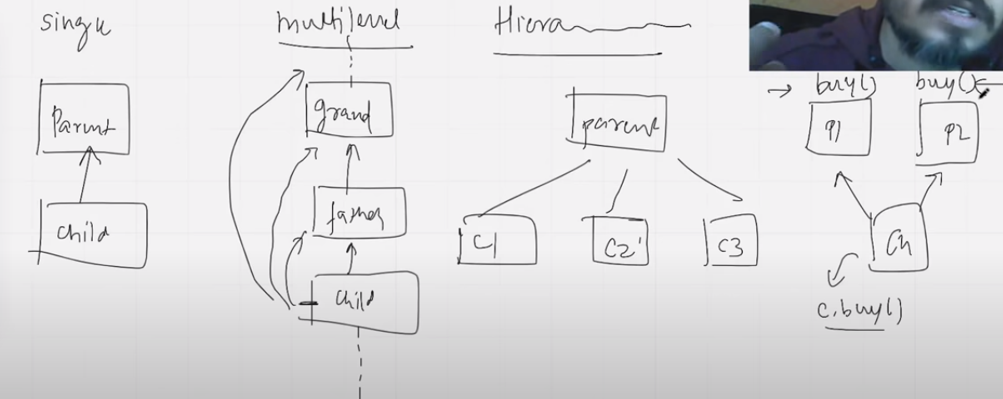

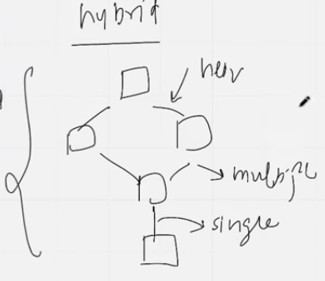

In [21]:
# single inheritance
class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class SmartPhone(Phone):
    pass

SmartPhone(1000,"Apple","13px").buy()

Inside phone constructor
Buying a phone


In [22]:
# multilevel inheritance
class Product:
    def review(self):
        print ("Product customer review")

class Phone(Product):
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class SmartPhone(Phone):
    pass

s=SmartPhone(20000, "Apple", 12)

s.buy()
s.review()

Inside phone constructor
Buying a phone
Product customer review


In [23]:
# Hierarchical inheritance
class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class SmartPhone(Phone):
    pass

class FeaturePhone(Phone):
    pass

SmartPhone(1000,"Apple","13px").buy()
FeaturePhone(10,"Lava","1px").buy()

Inside phone constructor
Buying a phone
Inside phone constructor
Buying a phone


In [24]:
# Multiple inheritance
class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class Product:
    def review(self):
        print ("Customer review")

class SmartPhone(Phone, Product):
    pass

s=SmartPhone(20000, "Apple", 12)

s.buy()
s.review()

Inside phone constructor
Buying a phone
Customer review


In [25]:
# the diamond problem
# https://stackoverflow.com/questions/56361048/what-is-the-diamond-problem-in-python-and-why-its-not-appear-in-python2
class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class Product:
    def buy(self):
        print ("Product buy method")

# Method resolution order (MRO)
class SmartPhone(Phone,Product):    # based on order of inherit here, decide whose method will execute
    pass

s=SmartPhone(20000, "Apple", 12)

s.buy()

Inside phone constructor
Buying a phone


In [26]:
class A:

    def m1(self):
        return 20

class B(A):

    def m1(self):
        return 30

    def m2(self):
        return 40

class C(B):

    def m2(self):
        return 20
obj1=A()
obj2=B()
obj3=C()
print(obj1.m1() + obj3.m1()+ obj3.m2())

70


In [27]:
class A:

    def m1(self):
        return 20

class B(A):

    def m1(self):
        val=super().m1()+30
        return val

class C(B):

    def m1(self):
        val=self.m1()+20
        return val
obj=C()
print(obj.m1())

RecursionError: maximum recursion depth exceeded

### Polymorphism

- Method Overriding
- Method Overloading
- Operator Overloading

**Method Overriding** - When child class and parent class have method with same name, then child class method will run.

**Method overloading** - When a class have multiple methods with same name but has different inputs it is called method overloading. It's use is to make code clean. In Python, it is **NOT SUPPORTED**. Use default argument.

**Operator overloading** - Same operator but depending of their input it will behave differently.

In [28]:
# method overloading

class Shape:

  def area(self,radius):
    return 3.14*radius*radius

  def area(self,l,b):
    return l*b

s = Shape()

print(s.area(2))
print(s.area(3,4))

TypeError: Shape.area() missing 1 required positional argument: 'b'

In [29]:
class Shape:

  def area(self,a,b=0):
    if b == 0:
      return 3.14*a*a
    else:
      return a*b

s = Shape()

print(s.area(2))
print(s.area(3,4))

12.56
12


In [30]:
# operator overloading
'hello' + 'world'   # concatenate

'helloworld'

In [31]:
5 + 6   # add

11

In [32]:
[1,2,3,4] + [5,6,7]   # merge

[1, 2, 3, 4, 5, 6, 7]

### Abstraction

Abstraction allows to put constraint on child class means Parent class can put constraint/ rules which child class must follow.

Abstract class - which has atleast one abstract method.

Abstract method - blank method, don't have any implementation.

How to make abstract class:

*   First, inherit from ABC class (must be child of ABC class)
*   Have atleast one abstract method

In [1]:
# here: abc -> abstract base classes module, ABC -> abstract base class
from abc import ABC,abstractmethod
class BankApp(ABC):   # abstract class

  def database(self):
    print('connected to database')

  @abstractmethod
  def security(self):    # abstract method
    pass

In [2]:
class MobileApp(BankApp):

  def mobile_login(self):
    print('login into mobile')

In [3]:
mob = MobileApp()

TypeError: Can't instantiate abstract class MobileApp with abstract method security

In child class, define definition of abstract methods. Otherwise, we cannot create object of child class.

In [4]:
class MobileApp(BankApp):

  def mobile_login(self):
    print('login into mobile')

  def security(self):
    print('mobile security')

In [5]:
mob = MobileApp()

In [6]:
mob.database()

connected to database


In [7]:
mob.security()   # method overriding

mobile security


In [8]:
obj = BankApp()

TypeError: Can't instantiate abstract class BankApp with abstract method security

We cannot make object of abstract class.

In [9]:
from abc import ABC,abstractmethod
class BankApp(ABC):

  def database(self):
    print('connected to database')

  @abstractmethod
  def security(self):
    pass

  @abstractmethod
  def display(self):
    pass

class MobileApp(BankApp):

  def mobile_login(self):
    print('login into mobile')

  def security(self):
    print('mobile security')

  def display(self):
    print('display')

In [11]:
mob = MobileApp()
mob.database()
mob.display()

connected to database
display
